In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
import pandas as pd
import math as math
import glob

Algo Snab Crowd Signals
========
Merging Data of Driving Car Accelerometer and Transit Accelerometer
========
First, we will merge csv files. Labels: Driving Car, Transit

In [3]:
drivingCarPath = r'/Users/yalcin.yenigun/dev/workspaces/gsu/Sample Dataset/Driving-Transit/Driving Car/csv'
drivingCarFiles = glob.glob(drivingCarPath + "/0_Accelerometer*.csv")
accDfCar = pd.DataFrame()
list_ = []
for file_ in drivingCarFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
accDfCar = pd.concat(list_)
accDfCar['label'] = 'driving car'

transitPath = r'/Users/yalcin.yenigun/dev/workspaces/gsu/Sample Dataset/Driving-Transit/Transit/csv'
transitFiles = glob.glob(transitPath + "/0_Accelerometer*.csv")
accDfTransit = pd.DataFrame()
list_ = []
for file_ in transitFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
accDfTransit = pd.concat(list_)
accDfTransit['label'] = 'transit'

accDfFrames = [accDfCar, accDfTransit]

accDf = pd.concat(accDfFrames)

xV = (accDf['x'] * accDf['x']) + (accDf['y'] * accDf['y']) + (accDf['z'] * accDf['z'])
accDf['acc'] = xV
accDf['acc'] = accDf['acc'].apply(math.sqrt)


In [4]:
accDf.head(2)

user_id                    sw_name sw_version        device_id device_type  \
0        0  crowdsignals.algosnap.com     1.0(1)  352622063881655  smartphone   
1        0  crowdsignals.algosnap.com     1.0(1)  352622063881655  smartphone   

   timezone           type                start                  end  \
0        -8  accelerometer  1464151307000000000  1464151308000000000   
1        -8  accelerometer  1464151307000000000  1464151308000000000   

                   sensor_name         x         y         z  \
0  MPU6500 Acceleration Sensor -0.705691  5.699995  7.353192   
1  MPU6500 Acceleration Sensor -0.745794  5.732317  7.289746   

            timestamps        label       acc  
0  1464151307983320729  driving car  9.330454  
1  1464151307985175416  driving car  9.303551

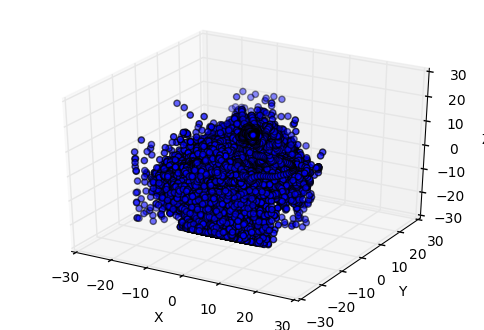

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(accDf['x'], accDf['y'], accDf['z'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Applying PCA to x,y,z and timestamp for Driving Car and Transit
======

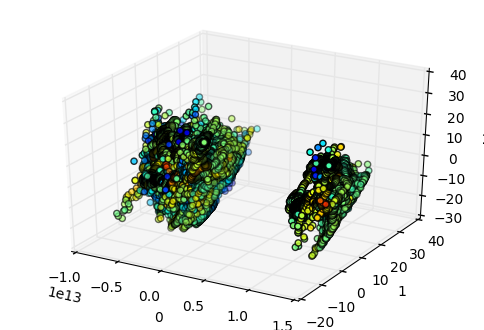

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

df1 = accDf[['x', 'y', 'z', 'end']]
df1.head()

pca.fit(df1)

acc_df_pca = pca.transform(df1)

fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(acc_df_pca[:, 0], acc_df_pca[:, 1], acc_df_pca[:, 2], c=acc_df_pca[:, 3])
ax.set_xlabel('0')
ax.set_ylabel('1')
ax.set_zlabel('2')

plt.show()


In [10]:
appDf = pd.read_csv('/Users/yalcin.yenigun/dev/workspaces/gsu/Sample Dataset/Driving-Transit/Driving Car/csv/0_Apps-352622063881655_1464151309092.csv')
appDf.head(3)

user_id                    sw_name sw_version        device_id device_type  \
0        0  crowdsignals.algosnap.com     1.0(1)  352622063881655  smartphone   
1        0  crowdsignals.algosnap.com     1.0(1)  352622063881655  smartphone   
2        0  crowdsignals.algosnap.com     1.0(1)  352622063881655  smartphone   

   timezone  type                start                  end               app  \
0        -8  apps  1464151307847000000  1464151307847000000   CrowdSignals.io   
1        -8  apps  1464151307847000000  1464151307847000000     TouchWiz home   
2        -8  apps  1464151307847000000  1464151307847000000  Microsoft Health   

                          process           timestamps  
0       com.algosnap.crowdsignals  1464151307847000000  
1    com.sec.android.app.launcher  1464151307847000000  
2  com.microsoft.kapp:BandService  1464151307847000000

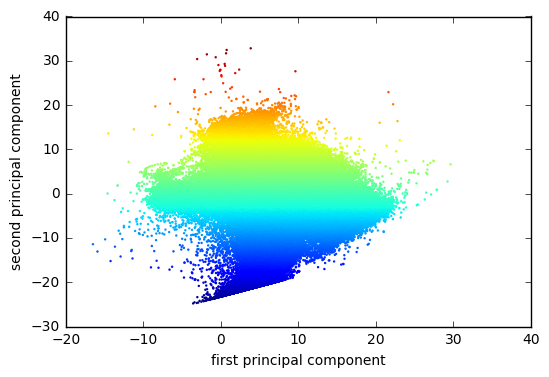

In [11]:
pca = PCA(n_components=3)

df3 = accDf[['x', 'y', 'z']]
pca.fit(df3)

acc_df3_pca = pca.transform(df3)

plt.scatter(acc_df3_pca[:, 0], acc_df3_pca[:, 1], c=acc_df3_pca[:, 1], linewidths=0, s=3)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

Accelerometer Dataframes for Bus, Light Train, Standing and Walking
======
First we load accelerometer data recursively from CSV file.

In [12]:
busPath = r'/Users/yalcin.yenigun/dev/workspaces/gsu/Sample Dataset/Driving-Transit/Transit/labeled_segments/dir_Bus_1464136930324000000_1464137727622000000'
accBusFiles = glob.glob(busPath + "/trim_0_Accelerometer*.csv")
accDfBus = pd.DataFrame()
list_ = []
for file_ in accBusFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
accDfBus = pd.concat(list_)
accDfBus['label'] = 'bus'

lightRailPath = r'/Users/yalcin.yenigun/dev/workspaces/gsu/Sample Dataset/Driving-Transit/Transit/labeled_segments/dir_Light_Rail_1464134398767000000_1464136341648000000'
accRailFiles = glob.glob(lightRailPath + "/trim_0_Accelerometer*.csv")
accDfRail = pd.DataFrame()
list_ = []
for file_ in accRailFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
accDfRail = pd.concat(list_)
accDfRail['label'] = 'light rail'

standingPath = r'/Users/yalcin.yenigun/dev/workspaces/gsu/Sample Dataset/Driving-Transit/Transit/labeled_segments/dir_Standing*'
accStandingFiles = glob.glob(standingPath + "/trim_0_Accelerometer*.csv")
accDfStanding = pd.DataFrame()
list_ = []
for file_ in accStandingFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
accDfStanding = pd.concat(list_)
accDfStanding['label'] = 'standing'

walkingPath = r'/Users/yalcin.yenigun/dev/workspaces/gsu/Sample Dataset/Driving-Transit/Transit/labeled_segments/dir_Walking*'
accWalkingFiles = glob.glob(walkingPath + "/trim_0_Accelerometer*.csv")
accDfWalking = pd.DataFrame()
list_ = []
for file_ in accWalkingFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
accDfWalking = pd.concat(list_)
accDfWalking['label'] = 'walking'

accDfTransitFrames = [accDfBus, accDfRail, accDfStanding, accDfWalking]

accDfTransit = pd.concat(accDfTransitFrames)

accDfTransit.size

12074565

In [15]:
accDfTransit.head(3)

user_id                    sw_name sw_version        device_id device_type  \
0        0  crowdsignals.algosnap.com     1.0(1)  352622063881655  smartphone   
1        0  crowdsignals.algosnap.com     1.0(1)  352622063881655  smartphone   
2        0  crowdsignals.algosnap.com     1.0(1)  352622063881655  smartphone   

   timezone           type                start                  end  \
0        -8  accelerometer  1464136930000000000  1464136931000000000   
1        -8  accelerometer  1464136930000000000  1464136931000000000   
2        -8  accelerometer  1464136930000000000  1464136931000000000   

                   sensor_name         x         y         z  \
0  MPU6500 Acceleration Sensor -0.697910  5.213374  7.218518   
1  MPU6500 Acceleration Sensor -0.442927  5.134366  7.589021   
2  MPU6500 Acceleration Sensor -0.083797  5.066730  7.977480   

            timestamps label  
0  1464136930324461563   bus  
1  1464136930328582135   bus  
2  1464136930333659688   bus

Visualize Accelerometer Data with Labels (bus, light rail, walking and standing)
======
We visualize accelerometer data 3d.

In [14]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline as po
from plotly.graph_objs import *

trace1 = go.Scatter3d(
    x = accDfTransit[accDfTransit.label=='bus'].x.head(2000),
    y = accDfTransit[accDfTransit.label=='bus'].y.head(2000),
    z = accDfTransit[accDfTransit.label=='bus'].z.head(2000),
    mode = 'markers',
    name = 'bus',
    marker=dict(
        color='rgb(76, 153, 0)',
        #showscale=True,
        size='4',
        #colorscale='Spectral',
        opacity=0.5
    )
)

trace2 = go.Scatter3d(
    x = accDfTransit[accDfTransit.label=='walking'].x.head(2000),
    y = accDfTransit[accDfTransit.label=='walking'].y.head(2000),
    z = accDfTransit[accDfTransit.label=='walking'].z.head(2000),
    mode = 'markers',
    name = 'walking',
    marker=dict(
        color='rgb(255, 0, 51)',
        #showscale=True,
        size='4',
        #colorscale='Spectral',
        opacity=0.5
    )
)

trace3 = go.Scatter3d(
    x = accDfTransit[accDfTransit.label=='light rail'].x.head(2000),
    y = accDfTransit[accDfTransit.label=='light rail'].y.head(2000),
    z = accDfTransit[accDfTransit.label=='light rail'].z.head(2000),
    mode = 'markers',
    name = 'light rail',
    marker=dict(
        color='rgb(51, 51, 255)',
        #showscale=True,
        size='4',
        #colorscale='Spectral',
        opacity=0.5
    )
)

trace4 = go.Scatter3d(
    x = accDfTransit[accDfTransit.label=='standing'].x.head(2000),
    y = accDfTransit[accDfTransit.label=='standing'].y.head(2000),
    z = accDfTransit[accDfTransit.label=='standing'].z.head(2000),
    mode = 'markers',
    name = 'standing',
    marker=dict(
        color='rgb(153, 0, 153)',
        #showscale=True,
        size='4',
        #colorscale='Spectral',
        opacity=0.5
    )
)

data = [trace1, trace2, trace3, trace4]

# Plot and embed in ipython notebook!

po.init_notebook_mode(connected=False)
po.iplot(data, filename='basic-scatter')

Load Pressure Data with Labels (bus, light rail, walking and standing)
======
Now we load pressure data with labels.

In [23]:
pressureBusFiles = glob.glob(busPath + "/trim_0_Pressure*.csv")
pressureDfBus = pd.DataFrame()
list_ = []
for file_ in pressureBusFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
pressureDfBus = pd.concat(list_)
pressureDfBus['label'] = 'bus'

pressureLightRailFiles = glob.glob(lightRailPath + "/trim_0_Pressure*.csv")
pressureDfLightRail = pd.DataFrame()
list_ = []
for file_ in pressureLightRailFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
pressureDfLightRail = pd.concat(list_)
pressureDfLightRail['label'] = 'light rail'

pressureStandingFiles = glob.glob(standingPath + "/trim_0_Pressure*.csv")
pressureDfStanding = pd.DataFrame()
list_ = []
for file_ in pressureStandingFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
pressureDfStanding = pd.concat(list_)
pressureDfStanding['label'] = 'standing'

pressureWalkingFiles = glob.glob(walkingPath + "/trim_0_Pressure*.csv")
pressureDfWalking = pd.DataFrame()
list_ = []
for file_ in pressureWalkingFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
pressureDfWalking = pd.concat(list_)
pressureDfWalking['label'] = 'walking'

pressureDfTransitFrames = [pressureDfBus, pressureDfLightRail, pressureDfStanding, pressureDfWalking]

pressureDfTransit = pd.concat(pressureDfTransitFrames)

pr

Visualize Pressure Data with Labels for 5.5 hours (bus, light rail, walking and standing)
======
Now we visualize pressure data with labels.

In [27]:
import datetime

trace1 = go.Scatter(
    x = pressureDfTransit[pressureDfTransit.label=='bus'].end.head(20000),
    y = pressureDfTransit[pressureDfTransit.label=='bus'].pressure.head(20000),
    mode = 'markers',
    name = 'bus',
    marker=dict(
        color='rgb(76, 153, 0)',
        #showscale=True,
        size='4',
        #colorscale='Spectral',
        opacity=0.5
    )
)

trace2 = go.Scatter(
    x = pressureDfTransit[pressureDfTransit.label=='walking'].end.head(20000),
    y = pressureDfTransit[pressureDfTransit.label=='walking'].pressure.head(20000),
    mode = 'markers',
    name = 'walking',
    marker=dict(
        color='rgb(255, 0, 51)',
        #showscale=True,
        size='4',
        #colorscale='Spectral',
        opacity=0.5
    )
)

trace3 = go.Scatter(
    x = pressureDfTransit[pressureDfTransit.label=='light rail'].end.head(20000),
    y = pressureDfTransit[pressureDfTransit.label=='light rail'].pressure.head(20000),
    mode = 'markers',
    name = 'light rail',
    marker=dict(
        color='rgb(51, 51, 255)',
        #showscale=True,
        size='4',
        #colorscale='Spectral',
        opacity=0.5
    )
)

trace4 = go.Scatter(
    x = pressureDfTransit[pressureDfTransit.label=='standing'].end.head(20000),
    y = pressureDfTransit[pressureDfTransit.label=='standing'].pressure.head(20000),
    mode = 'markers',
    name = 'standing',
    marker=dict(
        color='rgb(153, 0, 153)',
        #showscale=True,
        size='4',
        #colorscale='Spectral',
        opacity=0.5
    )
)

data = [trace1, trace2, trace3, trace4]

# Plot and embed in ipython notebook!

po.init_notebook_mode(connected=False)
po.iplot(data, filename='basic-scatter')